<h1 style="text-align: center;">Final Project Group Assignment 1</h1>

## Team 20:
**- Tufei Cai**

**- Clarice Fun**

**- Piero Dorian Trujillo**

**- Johnny Tiger Wei**

## Research Question:

**Does location of voting stations have any impact on voter turnout? Is there a disparity
in the number of voting stations between affluent areas and less affluent areas/counties?**

## Data Importation:

In [2]:
# create a SparkSession object
spark = SparkSession.builder.appName("ReadTabFileExample").getOrCreate()
datapath = "gs://pstat135-tc/VM2Uniform--WA--2020-12-09.tab" # Change the Bucket Number and Path

In [3]:
# Importing Data
df = spark.read\
.format("csv")\
.option("header", "true")\
.option("nullValue", "NA")\
.option("delimiter", "\t")\
.option("inferSchema", "true")\
.load(datapath)

In [4]:
# Chcking Schema
# df.printSchema()

In [5]:
columnNames = ['Voters_Active','County','City', 'CommercialData_EstimatedAreaMedianHHIncome', 'CommercialData_EstimatedHHIncome', 'CommercialData_AreaMedianHousingValue']
df2 = df.select(columnNames)
df2.show(20)

+-------------+------+---------+------------------------------------------+--------------------------------+-------------------------------------+
|Voters_Active|County|     City|CommercialData_EstimatedAreaMedianHHIncome|CommercialData_EstimatedHHIncome|CommercialData_AreaMedianHousingValue|
+-------------+------+---------+------------------------------------------+--------------------------------+-------------------------------------+
|            I| ADAMS|     null|                                   $101859|                    $25000-34999|                              $385836|
|            I| ADAMS|  OTHELLO|                                    $59499|                    $50000-74999|                              $146204|
|            I| ADAMS|  OTHELLO|                                    $59499|                    $50000-74999|                              $146204|
|            I| ADAMS|RITZVILLE|                                    $72954|                  $150000-174999|          

In [6]:
df_pandas = df2.toPandas() # Converting sql.dataframe to pandas dataframe

In [17]:
df_pandas.columns = ['Voter_Active','County','City','Area_Median_Income','Estimated_Income','Area_Median_Housing_Value']

In [18]:
df_pandas.head(10)

,Voter_Active,County,City,Area_Median_Income,Estimated_Income,Area_Median_Housing_Value
0,I,ADAMS,None,$101859,$25000-34999,$385836
1,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204
2,I,ADAMS,OTHELLO,$59499,$50000-74999,$146204
3,I,ADAMS,RITZVILLE,$72954,$150000-174999,$146801
4,I,ADAMS,RITZVILLE,None,$50000-74999,None
5,I,ADAMS,RITZVILLE,None,$50000-74999,None
6,I,ADAMS,RITZVILLE,None,None,None
7,I,ADAMS,None,$75367,$75000-99999,$288332
8,I,ADAMS,None,$70124,$50000-74999,$173863
9,I,ADAMS,None,$75367,$75000-99999,$288332


## Data Manipulation:

In [19]:
# Importing Packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Location and voter turnout rate

In [56]:
county_counts = df_pandas.pivot_table(index="County", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
county_totals = county_counts.sum(axis=1)

# compute the percentage of active
pct_active = county_counts["A"]/county_totals

result = pd.concat([county_counts, county_totals, pct_active], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
result.index.name = "County"
result.columns = ['Active','Inactive','Total Voters','Percentage of Active']

In [57]:
result.reset_index(inplace=True)
result.head(5)

,County,Active,Inactive,Total Voters,Percentage of Active
0,ADAMS,7422,429,7851,0.945357
1,ASOTIN,14132,1982,16114,0.877001
2,BENTON,119968,8190,128158,0.936095
3,CHELAN,48922,2763,51685,0.946542
4,CLALLAM,55253,2963,58216,0.949103


In [58]:
least_active_counties = result.sort_values(by='Percentage of Active', ascending=True).head(10)  # Top 10 counties have lowest active percentage
least_active_counties

,County,Active,Inactive,Total Voters,Percentage of Active
1,ASOTIN,14132,1982,16114,0.877001
25,PEND OREILLE,9895,1086,10981,0.901102
37,WHITMAN,23732,2601,26333,0.901227
11,GARFIELD,1654,174,1828,0.904814
12,GRANT,45262,3673,48935,0.924941
22,MASON,42232,3161,45393,0.930364
26,PIERCE,541731,40301,582032,0.930758
33,THURSTON,190613,13948,204561,0.931815
35,WALLA WALLA,35802,2613,38415,0.931980
7,COWLITZ,69738,5008,74746,0.933000


In [59]:
most_active_counties = result.sort_values(by='Percentage of Active', ascending=False).head(10)  # Top 10 counties have lowest active percentage
most_active_counties

,County,Active,Inactive,Total Voters,Percentage of Active
29,SKAMANIA,8445,236,8681,0.972814
19,KLICKITAT,15520,680,16200,0.958025
27,SAN JUAN,14127,625,14752,0.957633
16,KING,1371587,61758,1433345,0.956913
21,LINCOLN,7753,377,8130,0.953629
28,SKAGIT,82372,4011,86383,0.953567
23,OKANOGAN,25006,1299,26305,0.950618
38,YAKIMA,124440,6515,130955,0.950250
14,ISLAND,59554,3193,62747,0.949113
4,CLALLAM,55253,2963,58216,0.949103


## Socio-economic status and voter turnout rate

In [85]:
area_income_counts = df_pandas.pivot_table(index="Area_Median_Income", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
area_income_totals = area_income_counts.sum(axis=1)

# compute the percentage of active
pct_active_income = area_income_counts["A"]/area_income_totals

area_income_result = pd.concat([area_income_counts, area_income_totals, pct_active_income], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
area_income_result.index.name = "Area Median Income"
area_income_result.columns = ['Active','Inactive','Total Voters','Percentage of Active']
area_income_result.reset_index(inplace=True)

# convert currency to integer
area_income_result["Area Median Income"] = area_income_result["Area Median Income"].replace('[\$,]', '', regex=True)
area_income_result["Area Median Income"] = pd.to_numeric(area_income_result["Area Median Income"])

In [86]:
area_income_result.head(5)

,Area Median Income,Active,Inactive,Total Voters,Percentage of Active
0,0,17,1,18,0.944444
1,100120,928,36,964,0.962656
2,100132,1170,39,1209,0.967742
3,100173,874,26,900,0.971111
4,100213,1130,100,1230,0.918699


In [87]:
area_value_counts = df_pandas.pivot_table(index="Area_Median_Housing_Value", columns="Voter_Active", aggfunc="size", fill_value=0)

# compute the total number of voters
area_value_totals = area_value_counts.sum(axis=1)

# compute the percentage of active
pct_active_value = area_value_counts["A"]/area_value_totals

area_value_result = pd.concat([area_value_counts, area_value_totals, pct_active_value], axis=1, keys=["Active", "Inactive", "Total", "Pct Active"])
area_value_result.index.name = "Area Median Housing Value"
area_value_result.columns = ['Active','Inactive','Total Voters','Percentage of Active']
area_value_result.reset_index(inplace=True)

# convert currency to integer
area_value_result["Area Median Housing Value"] = area_value_result["Area Median Housing Value"].replace('[\$,]', '', regex=True)
area_value_result["Area Median Housing Value"] = pd.to_numeric(area_value_result["Area Median Housing Value"])

In [88]:
area_value_result.head(5)

,Area Median Housing Value,Active,Inactive,Total Voters,Percentage of Active
0,0,785,205,990,0.792929
1,101171,400,33,433,0.923788
2,101562,525,94,619,0.848142
3,101666,988,75,1063,0.929445
4,101922,355,38,393,0.903308


## Data Visualization:

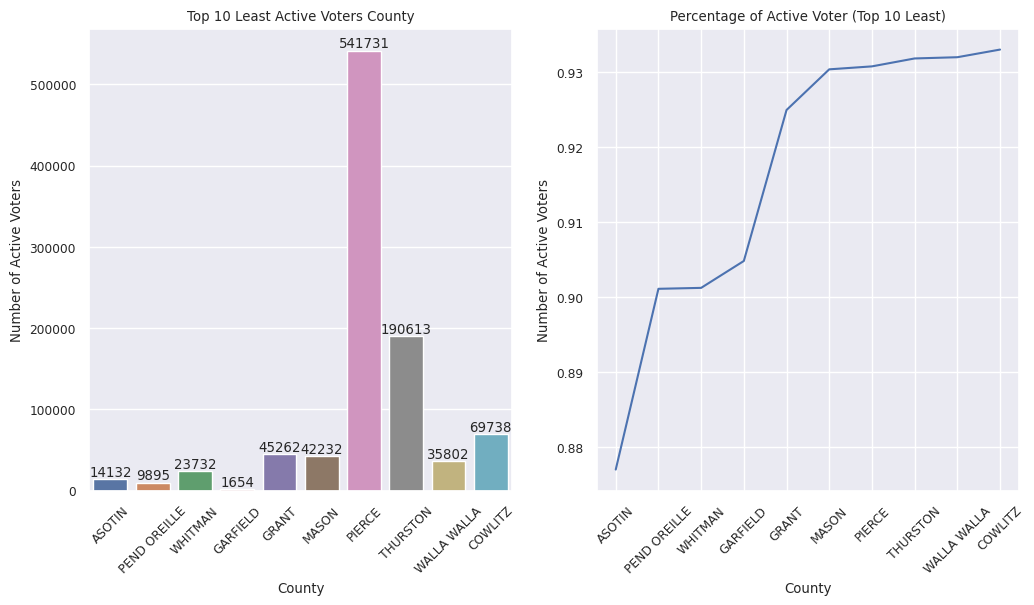

In [108]:
figure, axis = plt.subplots(1, 2,figsize=(12, 6))

sns.set(font_scale=0.8)
ax_1 = sns.barplot(data=least_active_counties, x="County", y="Active", ax = axis[0])
plt.setp(ax_1.get_xticklabels(), rotation=45)
ax_1.bar_label(ax_1.containers[0])
ax_1.set_ylabel("Number of Active Voters")
ax_1.set_xlabel("County")
ax_1.set_title("Top 10 Least Active Voters County")

sns.set(font_scale=0.8)
ax1 = sns.lineplot(data=least_active_counties, x="County", y="Percentage of Active", ax = axis[1])
plt.setp(ax1.get_xticklabels(), rotation=45)
ax1.set_ylabel("Number of Active Voters")
ax1.set_xlabel("County")
ax1.set_title("Percentage of Active Voter (Top 10 Least)")
plt.show()


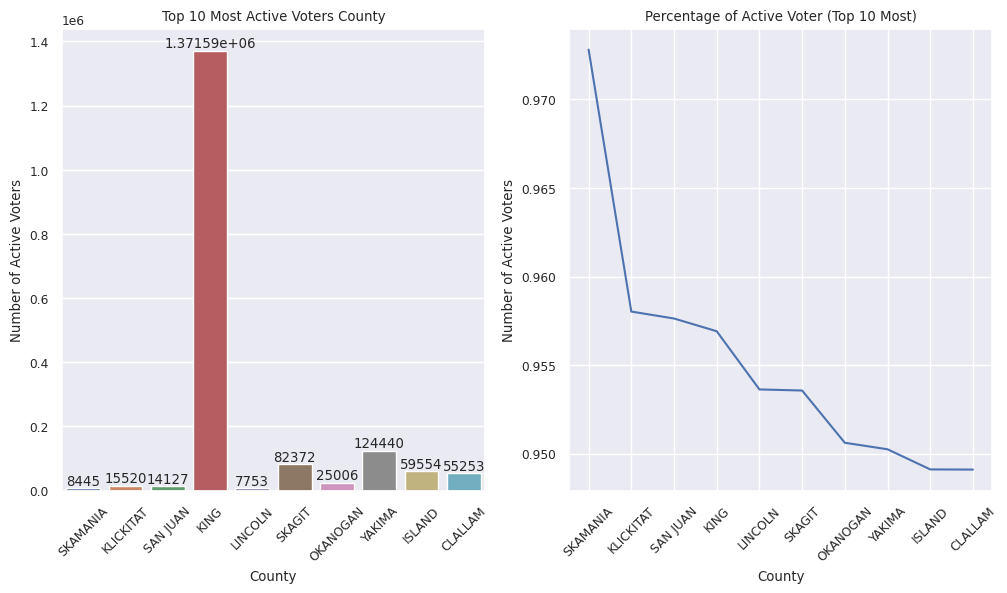

In [109]:
figure, axis1 = plt.subplots(1, 2,figsize=(12, 6))

sns.set(font_scale=0.8)
ax_2 = sns.barplot(data=most_active_counties, x="County", y="Active", ax = axis1[0])
plt.setp(ax_2.get_xticklabels(), rotation=45)
ax_2.bar_label(ax_2.containers[0])
ax_2.set_ylabel("Number of Active Voters")
ax_2.set_xlabel("County")
ax_2.set_title("Top 10 Most Active Voters County")

sns.set(font_scale=0.8)
ax2 = sns.lineplot(data=most_active_counties, x="County", y="Percentage of Active", ax = axis1[1])
plt.setp(ax2.get_xticklabels(), rotation=45)
ax2.set_ylabel("Number of Active Voters")
ax2.set_xlabel("County")
ax2.set_title("Percentage of Active Voter (Top 10 Most)")

plt.show()

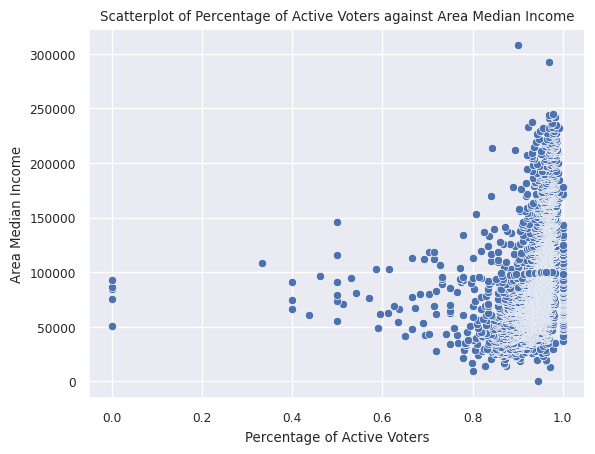

In [110]:
ax_4 = sns.scatterplot(x="Percentage of Active",
                    y="Area Median Income",
                    data=area_income_result)
ax_4.set_ylabel("Area Median Income")
ax_4.set_xlabel("Percentage of Active Voters")
ax_4.set_title("Scatterplot of Percentage of Active Voters against Area Median Income")

plt.show()

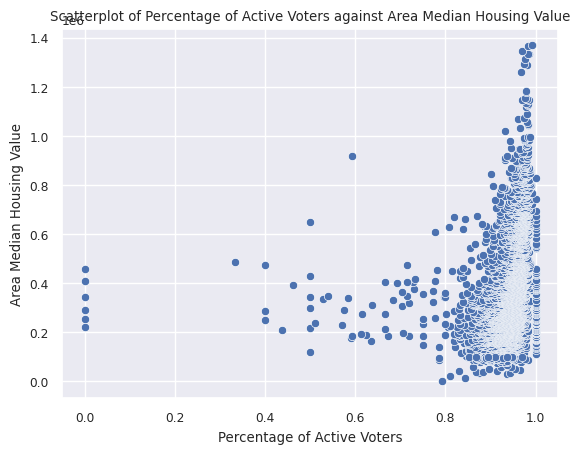

In [111]:
ax_5 = sns.scatterplot(x="Percentage of Active",
                    y="Area Median Housing Value",
                    data=area_value_result)
ax_5.set_ylabel("Area Median Housing Value")
ax_5.set_xlabel("Percentage of Active Voters")
ax_5.set_title("Scatterplot of Percentage of Active Voters against Area Median Housing Value")

plt.show()